## Circuit for factorizing N = 21 quantum using BQC protocol as suggested by Aritra Das.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import CPhaseGate
from fractions import Fraction
from math import gcd
import pandas as pd
import numpy

In [3]:
def circuit21A(qreg_q):

    'A-computation'

    qc = QuantumCircuit(qreg_q)
    qc.h(qreg_q[0])
    qc.h(qreg_q[1])
    qc.x(qreg_q[-1])
    qc.cx(qreg_q[1], qreg_q[3])
    qc.cx(qreg_q[0], qreg_q[2])
    qc.cx(qreg_q[1], qreg_q[-1])
    qc.cx(qreg_q[0], qreg_q[-1])
    qc.measure_all()
   


    return qc

In [4]:
def circuit21B(qreg_q):

    'B-computation'

    qc = QuantumCircuit(qreg_q)
    qc.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
    qc.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
    qc.h(qreg_q[0])
    S_control = CPhaseGate(90).control(0)
    qc.append(S_control, [qreg_q[0], qreg_q[1]])
    qc.h(qreg_q[1])
    qc.measure_all()
    


    return qc

In [5]:
qreg_q = QuantumRegister(5, 'q')
circuitA = circuit21A(qreg_q)
circuitB = circuit21B(qreg_q)

In [6]:
circuitA.draw()


┌───┐                     ░ ┌─┐            
   q_0: ┤ H ├───────■─────────■───░─┤M├────────────
        ├───┤       │         │   ░ └╥┘┌─┐         
   q_1: ┤ H ├──■────┼────■────┼───░──╫─┤M├─────────
        └───┘  │  ┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ───────┼──┤ X ├──┼────┼───░──╫──╫─┤M├──────
             ┌─┴─┐└───┘  │    │   ░  ║  ║ └╥┘┌─┐   
   q_3: ─────┤ X ├───────┼────┼───░──╫──╫──╫─┤M├───
        ┌───┐└───┘     ┌─┴─┐┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ X ├──────────┤ X ├┤ X ├─░──╫──╫──╫──╫─┤M├
        └───┘          └───┘└───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

In [7]:
circuitB.draw()

┌───┐              ░ ┌─┐            
   q_0: ──■────■──┤ H ├─■────────────░─┤M├────────────
          │    │  └───┘ │P(90) ┌───┐ ░ └╥┘┌─┐         
   q_1: ──■────■────────■──────┤ H ├─░──╫─┤M├─────────
          │  ┌─┴─┐             └───┘ ░  ║ └╥┘┌─┐      
   q_2: ──┼──┤ X ├───────────────────░──╫──╫─┤M├──────
        ┌─┴─┐└───┘                   ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ X ├────────────────────────░──╫──╫──╫─┤M├───
        └───┘                        ░  ║  ║  ║ └╥┘┌─┐
   q_4: ─────────────────────────────░──╫──╫──╫──╫─┤M├
                                     ░  ║  ║  ║  ║ └╥┘
meas: 5/════════════════════════════════╩══╩══╩══╩══╩═
                                        0  1  2  3  4

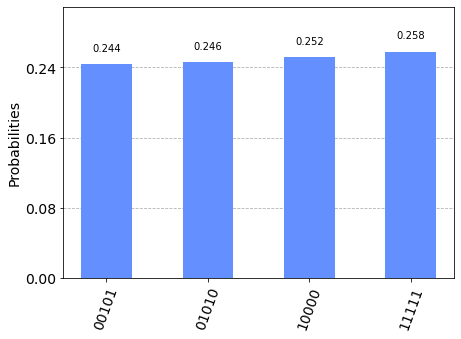

In [34]:
#Phase estimation step:
backend = Aer.get_backend('qasm_simulator')
resultsA = execute(circuitA, backend).result()
resultsB = execute(circuitB, backend).result()
countsA = resultsA.get_counts()
countsB = resultsB.get_counts()
plot_histogram(countsA)


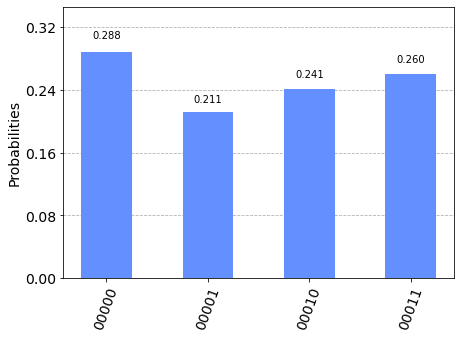

In [37]:
plot_histogram(countsB)

In [41]:
n_count = 5
rows, measured_phases = [], []
for output in countsB:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(21)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register Output        Phase
0  00001(bin) =   1(dec)  1/32 = 0.03
1  00010(bin) =   2(dec)  2/32 = 0.06
2  00011(bin) =   3(dec)  3/32 = 0.09
3  00000(bin) =   0(dec)  0/32 = 0.00
     Phase Fraction  Guess for r
0  0.03125     1/21           21
1  0.06250     1/16           16
2  0.09375     2/21           21
3  0.00000      0/1            1


In [45]:
a = 4
r = 21
N = 21
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 1]
